In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import sys
from imp import reload
sys.path.append('..')
import support.data_functions as dfunc
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_context("talk", font_scale=1.4)

In [3]:
censusdf = dfunc.load_all_census()

In [4]:
reload(dfunc)
crimedf = dfunc.load_all_crime()
crimedf.head()

,Year,Murder,Robbery,Assault,Burglary,State,City
0,1960,5,49,108,505,AK,Anchorage
1,1961,5,42,82,323,AK,Anchorage
2,1962,0,0,0,0,AK,Anchorage
3,1963,6,70,92,464,AK,Anchorage
4,1964,17,40,90,515,AK,Anchorage


In [5]:
reload(dfunc)
mdf = dfunc.produce_merged_dataframe()
mdf.head()


,AsianPop,BlackPop,City,HispanicPop,NativePop,State,TotalPop,WhitePop,Year,WhitePopFrac,...,TotalPopSlope,Region,Murder,Robbery,Assault,Burglary,MurderRate,RobberyRate,AssaultRate,BurglaryRate
0,NaN,1517,Anchorage,0,NaN,AK,14502,12985,1960,0.895394,...,1612.565714,Non-contiguous,5,49,108,505,3.447800,33.788443,74.472487,348.227831
1,NaN,1128,Anchorage,0,NaN,AK,18415,15999,1970,0.868803,...,1612.565714,Non-contiguous,11,213,218,1264,5.973391,115.666576,118.381754,686.396959
2,NaN,4490,Anchorage,2432,NaN,AK,76844,65195,1980,0.848407,...,1612.565714,Non-contiguous,42,431,2832,4384,5.465619,56.087658,368.538858,570.506481
3,3508.0,6016,Anchorage,3647,5615.0,AK,81560,64887,1990,0.795574,...,1612.565714,Non-contiguous,55,630,8269,6705,6.743502,77.243747,1013.854831,822.094164
4,4160.0,4998,Anchorage,5305,6133.0,AK,77469,54505,2000,0.703572,...,1612.565714,Non-contiguous,38,710,11427,5440,4.905188,91.649563,1475.041630,702.216370


In [6]:
mildf = mdf[mdf.City == 'Milwaukee']


In [7]:
races = ['WhitePop', 'NativePop', 'HispanicPop', 'BlackPop', 'TotalPop']

[x for x in mildf.columns if 'Pop' in x]

In [8]:
for r in races:
    mildf[r + 'PctChange'] = mildf[r].pct_change()

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
mildf

,AsianPop,BlackPop,City,HispanicPop,NativePop,State,TotalPop,WhitePop,Year,WhitePopFrac,...,Burglary,MurderRate,RobberyRate,AssaultRate,BurglaryRate,WhitePopPctChange,NativePopPctChange,HispanicPopPctChange,BlackPopPctChange,TotalPopPctChange
786,NaN,20076,Milwaukee,0,NaN,WI,199586,179510,1960,0.899412,...,3385,2.054252,11.273336,44.241580,169.601074,NaN,NaN,NaN,NaN,NaN
787,NaN,33689,Milwaukee,0,NaN,WI,216485,180396,1970,0.833296,...,7482,6.005035,46.746888,55.061552,345.612860,0.004936,NaN,NaN,0.678073,0.084670
788,NaN,56518,Milwaukee,10521,NaN,WI,239601,173473,1980,0.724008,...,16924,6.176936,129.465236,352.335758,706.340959,-0.038377,NaN,inf,0.677640,0.106779
789,4651.0,67735,Milwaukee,14876,2261.0,WI,219741,136852,1990,0.622788,...,14477,13.879977,300.626647,1283.101469,658.821067,-0.211105,NaN,0.413934,0.198468,-0.082888
790,7159.0,68640,Milwaukee,29036,1780.0,WI,193496,94591,2000,0.488852,...,11199,11.886551,252.563360,990.924877,578.771654,-0.308808,-0.212738,0.951869,0.013361,-0.119436
791,9189.0,74918,Milwaukee,37574,1546.0,WI,204306,94673,2010,0.463388,...,12755,6.607735,265.728858,1016.171821,624.308635,0.000867,-0.131461,0.294049,0.091463,0.055867


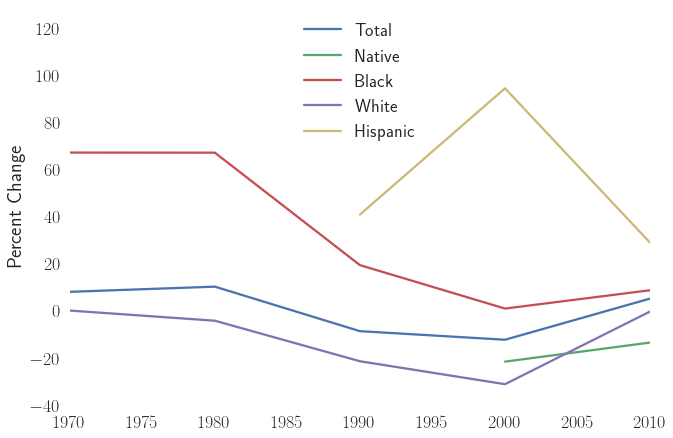

In [10]:
plotdata = {}
years = [1960, 1970, 1980, 1990, 2000, 2010]
subdf = mildf[[x for x in mildf.columns if 'Pct' in x]]
for col in subdf.columns:
    key = col.split('Pop')[0]
    plotdata[key] = []
    for y, v in zip(years, subdf[col].values):
        plotdata[key].append([y, v*100])
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
ax.grid(b=False)
for r, dset in plotdata.items():
    ax.plot([x[0] for x in dset], [y[1] for y in dset], label=r) 
ax.set_ylim(-40, 130)
ax.set_ylabel('Percent Change')
ax.legend(loc=9, frameon=False)
plt.savefig('milwaukee_ethnicity.eps')

In [14]:
mildf.Murder

786     41
787    130
788    148
789    305
790    230
791    135
Name: Murder, dtype: int64

In [15]:
mildf.TotalPop

786    199586
787    216485
788    239601
789    219741
790    193496
791    204306
Name: TotalPop, dtype: int64

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


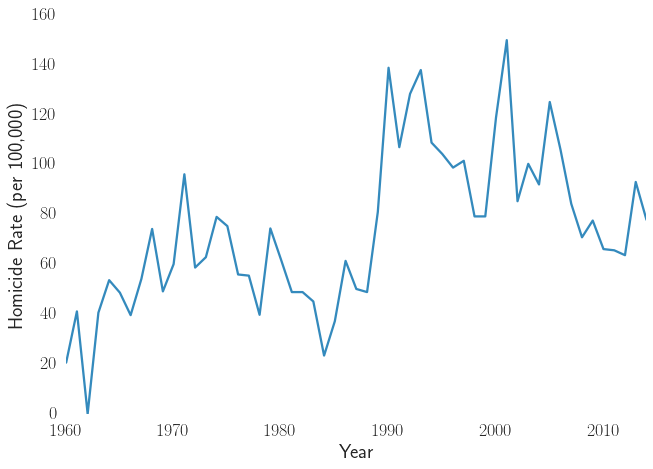

In [85]:
popdict = dict(mildf.loc[:, ['Year', 'TotalPop']].values)

def normer(row):
    k = int(str(row['Year'])[:-1] + '0')
    return row['Murder'] / popdict[k] * 100000

milcrime = crimedf[crimedf.City == 'Milwaukee']
milcrime['MurderPerCapita'] = milcrime.apply(normer, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
ax = milcrime.plot(x='Year', y='MurderPerCapita', ax = ax)
ax.grid(b=False)
ax.set_ylabel('Homicide Rate (per 100,000)')
ax.legend('', frameon=False)
plt.savefig('milwaukee_murder_rate.eps')

In [87]:
natmurder = pd.read_excel('../../Data/us_murder_rate.xlsx')
natmurder.head()

,Year,Homicide
0,1950,4.6
1,1951,4.4
2,1952,4.6
3,1953,4.5
4,1954,4.2


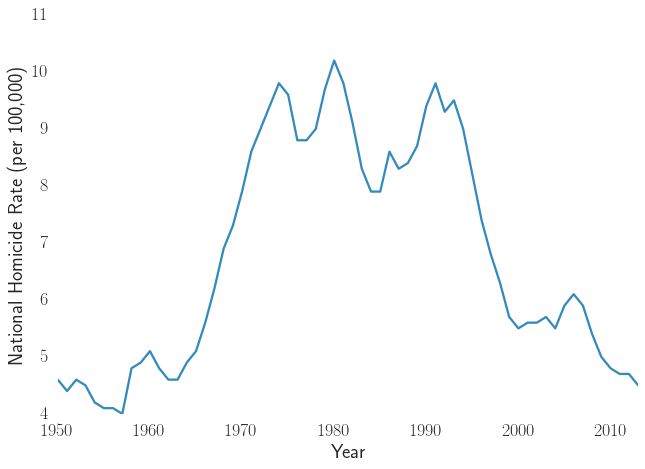

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
ax = natmurder.plot(x='Year', y=natmurder.columns[1], ax = ax)
ax.grid(b=False)
ax.set_ylabel('National Homicide Rate (per 100,000)')
ax.legend('')
plt.savefig('national_murder.eps')

In [6]:
# print( len(censusdf.City.unique()) )

# print( len(censusdf[censusdf.TotalPop >= 50000].City.unique()))
# for x in set([' '.join(x) for x in censusdf[censusdf.TotalPop >= 50000].loc[:, ['City', 'State']].values ]):
#     print(x)

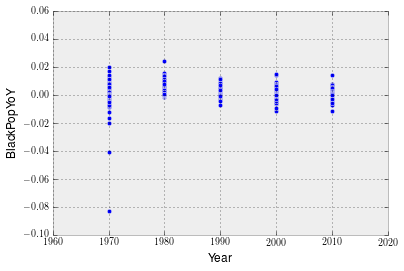

In [6]:
mdf.plot(kind='scatter', x='Year', y='BlackPopYoY')

## Lets start with the years

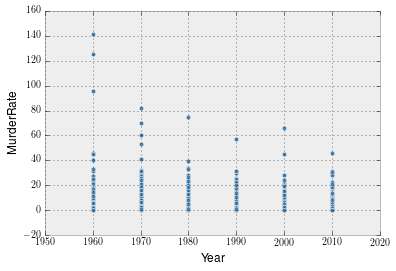

In [7]:
mdf.plot(kind='Scatter', x='Year', y='MurderRate',  color='steelblue')

## Against population

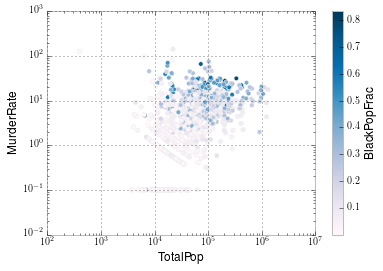

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
#Change the zeros to 0.001 to work with log
mdf.MurderRate = mdf.MurderRate + 0.1
mdf[mdf.MurderRate != 0].plot(ax = ax, kind='scatter', x='TotalPop', y='MurderRate',  c='BlackPopFrac', \
                              loglog=True, cmap='PuBu')
plt.savefig('../../Results/exploratory/murderRate_v_totalPop.eps')

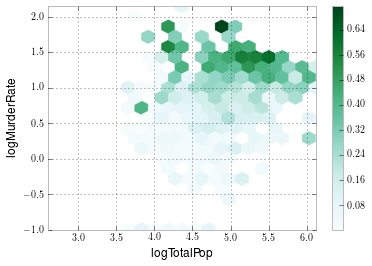

In [9]:
mdf['logTotalPop'] = np.log10(mdf['TotalPop'])
mdf['logMurderRate'] = np.log10(mdf['MurderRate'])


fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
ax.grid(b'False')
mdf.plot.hexbin('logTotalPop', 'logMurderRate', C='BlackPopFrac', gridsize = 20, ax = ax)
plt.savefig('../../Results/exploratory/murderRate_v_TotalPop_hexgrid.eps')

## I want to understand if this pattern is only because of concatenating all years

In [10]:
year = mdf.Year.unique()

In [11]:
year

array([1960, 1970, 1980, 1990, 2000, 2010])

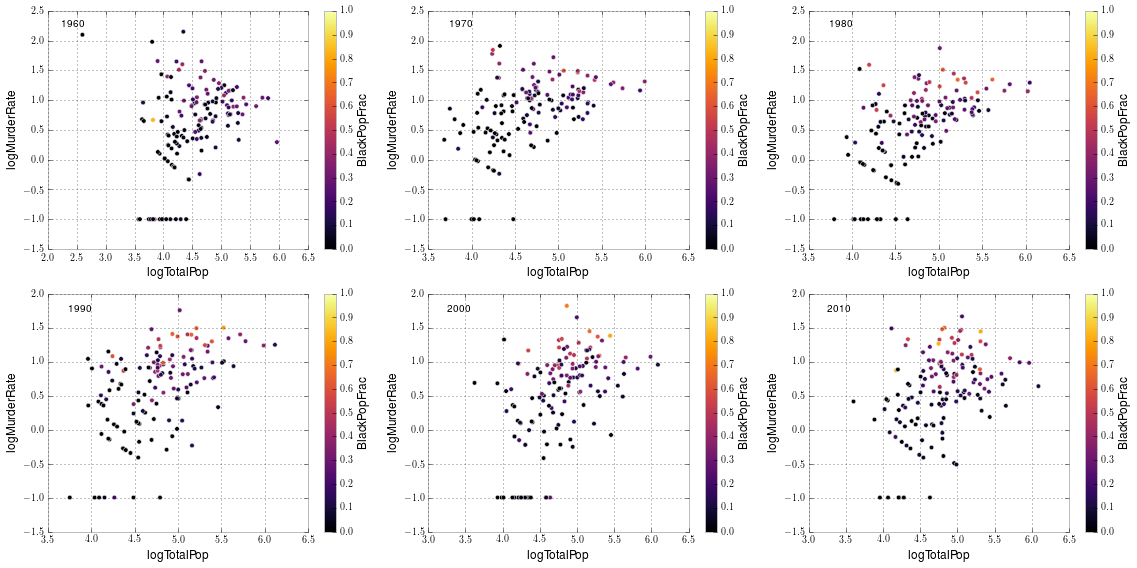

In [12]:
fig = plt.figure(figsize = (16, 8))
for i in range(len(year)):
    ax = fig.add_subplot(2, 3, i+1, axisbg='white')
    mdf[mdf.Year == year[i]].plot(kind='scatter', x = 'logTotalPop', y = 'logMurderRate', c='BlackPopFrac', \
                                     cmap='inferno', vmin=0, vmax = 1, ax = ax)
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.text(xmin+0.25, ymax - 0.25, year[i])
plt.tight_layout()
plt.savefig('../../Results/exploratory/year_segmentation.eps')

# Focus on just the top 10 black, top 10 white

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


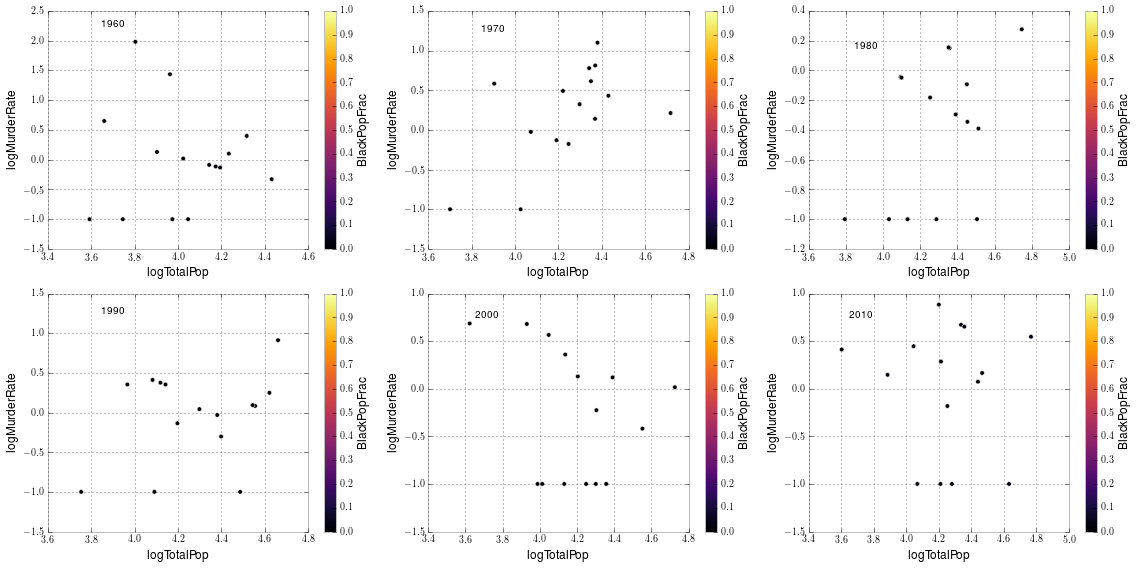

In [13]:
fig = plt.figure(figsize = (16, 8))
for i in range(len(year)):
    ax = fig.add_subplot(2, 3, i+1, axisbg='white')
    ymdf = mdf[mdf.Year == year[i]]
    ymdf.sort_values('WhitePopFrac', ascending= False, inplace=True)
    
    ymdf.head(15).plot(kind='scatter', x = 'logTotalPop', y = 'logMurderRate', c='BlackPopFrac', \
                                     cmap='inferno', vmin=0, vmax = 1, ax = ax)
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.text(xmin+0.25, ymax - 0.25, year[i])
plt.tight_layout()
plt.savefig('../../Results/exploratory/topwhite_year_segmentation.eps')

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


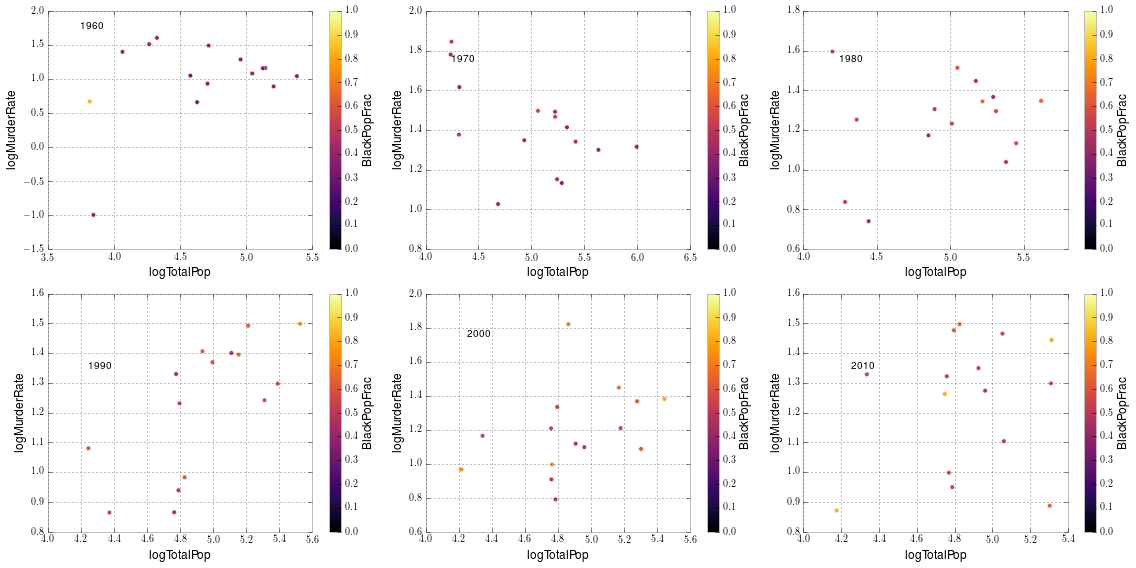

In [14]:
fig = plt.figure(figsize = (16, 8))
for i in range(len(year)):
    ax = fig.add_subplot(2, 3, i+1, axisbg='white')
    ymdf = mdf[mdf.Year == year[i]]
    ymdf.sort_values('BlackPopFrac', ascending= False, inplace=True)
    
    ymdf.head(15).plot(kind='scatter', x = 'logTotalPop', y = 'logMurderRate', c='BlackPopFrac', \
                                     cmap='inferno', vmin=0, vmax = 1, ax = ax)
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.text(xmin+0.25, ymax - 0.25, year[i])
plt.tight_layout()
plt.savefig('../../Results/exploratory/topblack_year_segmentation.eps')

# What happens if we segment based on 50k total pop

In [15]:
poplimitdf = mdf[mdf.TotalPop > 50000]

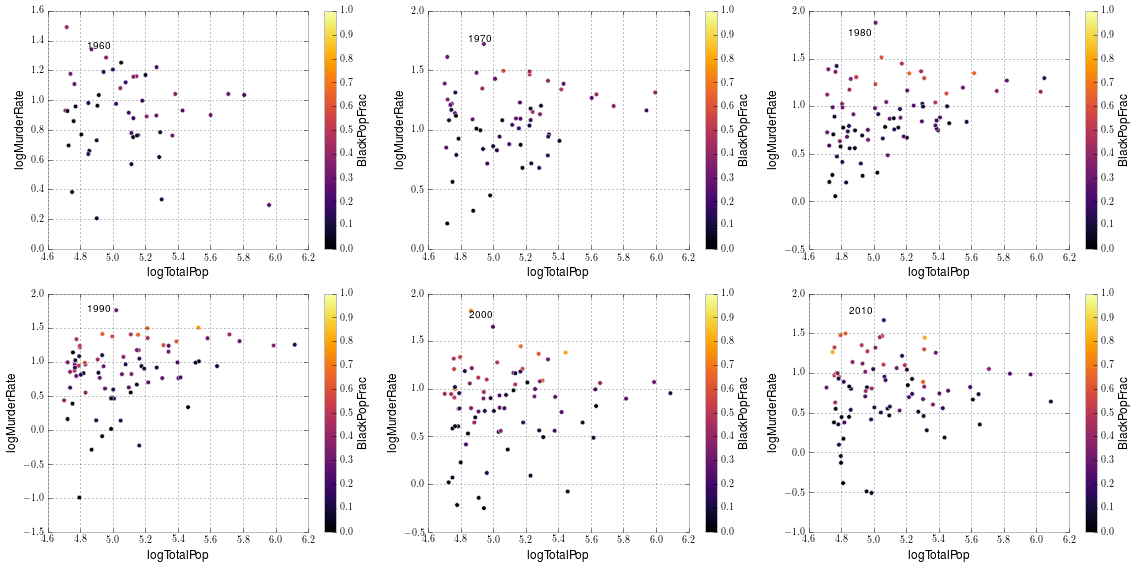

In [16]:
fig = plt.figure(figsize = (16, 8))
for i in range(len(year)):
    ax = fig.add_subplot(2, 3, i+1, axisbg='white')
    poplimitdf[poplimitdf.Year == year[i]].plot(kind='scatter', x = 'logTotalPop', y = 'logMurderRate', c='BlackPopFrac', \
                                     cmap='inferno', vmin=0, vmax = 1, ax = ax)
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.text(xmin+0.25, ymax - 0.25, year[i])
plt.tight_layout()

# Let's test out some regressions

In [17]:
import statsmodels.formula.api as smf

In [25]:
smf.ols('MurderRate ~ WhitePopFrac + WhitePopSlope', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     53.48
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           1.96e-21
Time:                        16:34:29   Log-Likelihood:                -1504.1
No. Observations:                 426   AIC:                             3014.
Df Residuals:                     423   BIC:                             3026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        30.1588      2.127     14.182      0.000        25.979    34.339
WhitePopFrac    -23.9536      2.317    -10.339      0.000       -28.507   -19.400
WhitePopSlope   592.1578    169.249      3.499      0.001       259.485   924.831
==============================================================================
Omnibus:                      259.906   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2730.295
Skew:                           2.462   Prob(JB):                         0.00
Kurtosis:                      14.383   Cond. No.                         508.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
smf.ols('MurderRate ~ BlackPopFrac + BlackPopSlope', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           2.75e-41
Time:                        16:34:04   Log-Likelihood:                -1458.0
No. Observations:                 426   AIC:                             2922.
Df Residuals:                     423   BIC:                             2934.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         3.7682      0.599      6.290      0.000         2.591     4.946
BlackPopFrac     38.5258      2.636     14.617      0.000        33.345    43.706
BlackPopSlope -1153.0720    192.656     -5.985      0.000     -1531.755  -774.389
==============================================================================
Omnibus:                      286.928   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4105.314
Skew:                           2.687   Prob(JB):                         0.00
Kurtosis:                      17.227   Cond. No.                         550.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
smf.ols('MurderRate ~ TotalPop + WhitePopFrac + BlackPopFrac + C(Year)', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     30.22
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           3.09e-37
Time:                        16:31:35   Log-Likelihood:                -1454.7
No. Observations:                 426   AIC:                             2927.
Df Residuals:                     417   BIC:                             2964.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          14.0440      5.729      2.451      0.015         2.783    25.305
C(Year)[T.1970]     4.3990      1.428      3.081      0.002         1.592     7.206
C(Year)[T.1980]    -1.0876      1.400     -0.777      0.438        -3.839     1.664
C(Year)[T.1990]    -2.1888      1.483     -1.476      0.141        -5.104     0.727
C(Year)[T.2000]    -3.6779      1.647     -2.233      0.026        -6.916    -0.440
C(Year)[T.2010]    -4.6097      1.713     -2.690      0.007        -7.978    -1.242
TotalPop         4.436e-07   2.22e-06      0.200      0.842     -3.92e-06  4.81e-06
WhitePopFrac      -10.4206      5.712     -1.824      0.069       -21.649     0.808
BlackPopFrac       21.2089      4.994      4.247      0.000        11.392    31.026
==============================================================================
Omnibus:                      352.123   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8140.253
Skew:                           3.410   Prob(JB):                         0.00
Kurtosis:                      23.300   Cond. No.                     6.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
smf.ols('MurderRate ~ TotalPop + WhitePopFrac + BlackPopFrac  + C(Year)', \
        data = mdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     29.92
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           3.45e-41
Time:                        13:04:28   Log-Likelihood:                -3114.3
No. Observations:                 828   AIC:                             6247.
Df Residuals:                     819   BIC:                             6289.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          14.9321      4.328      3.450      0.001         6.437    23.427
C(Year)[T.1970]     1.0403      1.262      0.825      0.410        -1.436     3.517
C(Year)[T.1980]    -4.2024      1.285     -3.271      0.001        -6.724    -1.680
C(Year)[T.1990]    -4.7263      1.313     -3.599      0.000        -7.304    -2.148
C(Year)[T.2000]    -6.5943      1.416     -4.657      0.000        -9.374    -3.815
C(Year)[T.2010]    -6.8102      1.462     -4.658      0.000        -9.680    -3.940
TotalPop         1.124e-06   2.62e-06      0.428      0.669     -4.03e-06  6.28e-06
WhitePopFrac       -8.7715      4.260     -2.059      0.040       -17.133    -0.410
BlackPopFrac       22.1233      4.260      5.193      0.000        13.761    30.485
==============================================================================
Omnibus:                     1053.885   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150705.952
Skew:                           6.530   Prob(JB):                         0.00
Kurtosis:                      67.790   Cond. No.                     3.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## White and blakc population fractions are significant and the signs are in the same direction even with the segmentation at 50k residents

In [183]:
smf.ols('MurderRate ~ TotalPop + WhitePopFrac + BlackPopFrac + WhitePopYoY + BlackPopYoY + C(Year)', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     25.09
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.60e-33
Time:                        13:04:28   Log-Likelihood:                -1297.7
No. Observations:                 377   AIC:                             2615.
Df Residuals:                     367   BIC:                             2655.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           7.9973      5.482      1.459      0.145        -2.783    18.777
C(Year)[T.1970]     7.4355      1.827      4.071      0.000         3.844    11.027
C(Year)[T.1980]     2.2223      1.708      1.301      0.194        -1.136     5.580
C(Year)[T.1990]     0.8325      1.361      0.612      0.541        -1.844     3.509
C(Year)[T.2000]    -0.8508      1.231     -0.691      0.490        -3.271     1.570
C(Year)[T.2010]    -1.6421      0.913     -1.799      0.073        -3.437     0.152
TotalPop         1.458e-06   2.46e-06      0.593      0.553     -3.37e-06  6.29e-06
WhitePopFrac       -7.5910      7.126     -1.065      0.287       -21.603     6.421
BlackPopFrac       25.9023      6.407      4.043      0.000        13.303    38.501
WhitePopYoY       -50.6086    120.458     -0.420      0.675      -287.484   186.266
BlackPopYoY      -221.0428    150.244     -1.471      0.142      -516.490    74.404
==============================================================================
Omnibus:                      316.466   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6953.443
Skew:                           3.448   Prob(JB):                         0.00
Kurtosis:                      22.877   Cond. No.                     1.19e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [184]:
smf.ols('MurderRate ~ TotalPop + WhitePopFrac + BlackPopFrac + WhitePopYoY + BlackPopYoY + C(Year)', \
            data = mdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     48.85
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           5.71e-68
Time:                        13:04:28   Log-Likelihood:                -2376.6
No. Observations:                 690   AIC:                             4773.
Df Residuals:                     680   BIC:                             4819.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          10.4511      2.856      3.659      0.000         4.843    16.060
C(Year)[T.1970]     7.4614      0.999      7.470      0.000         5.500     9.423
C(Year)[T.1980]     2.3058      0.952      2.422      0.016         0.436     4.175
C(Year)[T.1990]     1.5498      0.825      1.879      0.061        -0.070     3.169
C(Year)[T.2000]    -0.0781      0.792     -0.099      0.921        -1.633     1.477
C(Year)[T.2010]    -0.7878      0.647     -1.218      0.224        -2.058     0.482
TotalPop         3.043e-06   2.02e-06      1.503      0.133     -9.33e-07  7.02e-06
WhitePopFrac      -10.9304      3.649     -2.996      0.003       -18.095    -3.766
BlackPopFrac       21.2855      3.690      5.768      0.000        14.039    28.531
WhitePopYoY       100.2947     77.164      1.300      0.194       -51.214   251.804
BlackPopYoY        94.5780     77.990      1.213      0.226       -58.551   247.707
==============================================================================
Omnibus:                      633.753   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24185.702
Skew:                           4.042   Prob(JB):                         0.00
Kurtosis:                      30.855   Cond. No.                     3.06e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.53e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Lets try it with the long term patterns

In [185]:
smf.ols('MurderRate ~  WhitePopFrac + BlackPopFrac + WhitePopSlope + BlackPopSlope + BlackPopYoY + C(Year)', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     32.98
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           2.70e-42
Time:                        13:04:28   Log-Likelihood:                -1276.4
No. Observations:                 377   AIC:                             2573.
Df Residuals:                     367   BIC:                             2612.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          12.1284      6.784      1.788      0.075        -1.212    25.469
C(Year)[T.1970]     8.9300      2.248      3.972      0.000         4.509    13.351
C(Year)[T.1980]     2.8181      1.868      1.509      0.132        -0.855     6.492
C(Year)[T.1990]     1.4814      1.593      0.930      0.353        -1.651     4.614
C(Year)[T.2000]    -0.1309      1.161     -0.113      0.910        -2.415     2.153
C(Year)[T.2010]    -0.9703      1.035     -0.937      0.349        -3.006     1.066
WhitePopFrac      -11.2223      8.159     -1.375      0.170       -27.266     4.821
BlackPopFrac       32.9718      8.273      3.985      0.000        16.702    49.241
WhitePopSlope     321.2589    275.195      1.167      0.244      -219.898   862.415
BlackPopSlope   -1246.5101    323.949     -3.848      0.000     -1883.539  -609.481
BlackPopYoY        76.4563    105.839      0.722      0.471      -131.670   284.583
==============================================================================
Omnibus:                      280.208   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4673.044
Skew:                           2.976   Prob(JB):                         0.00
Kurtosis:                      19.188   Cond. No.                     7.66e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [186]:
smf.ols('MurderRate ~  WhitePopFrac + BlackPopFrac + WhitePopSlope + BlackPopSlope + BlackPopYoY + C(Year)', \
            data = mdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     56.06
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           3.63e-76
Time:                        13:04:28   Log-Likelihood:                -2357.2
No. Observations:                 690   AIC:                             4734.
Df Residuals:                     680   BIC:                             4780.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.9295      4.578      0.421      0.674        -7.059    10.918
C(Year)[T.1970]     5.5772      1.452      3.841      0.000         2.726     8.429
C(Year)[T.1980]    -0.1575      1.243     -0.127      0.899        -2.598     2.283
C(Year)[T.1990]    -0.3382      1.133     -0.299      0.765        -2.562     1.886
C(Year)[T.2000]    -1.5716      0.857     -1.834      0.067        -3.254     0.111
C(Year)[T.2010]    -1.5805      0.776     -2.036      0.042        -3.105    -0.056
WhitePopFrac        0.1570      5.429      0.029      0.977       -10.503    10.817
BlackPopFrac       40.9630      6.108      6.706      0.000        28.970    52.956
WhitePopSlope     -39.3614    202.886     -0.194      0.846      -437.720   358.997
BlackPopSlope   -1207.2704    266.457     -4.531      0.000     -1730.448  -684.093
BlackPopYoY       168.8198     63.970      2.639      0.009        43.217   294.423
==============================================================================
Omnibus:                      613.134   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22963.879
Skew:                           3.835   Prob(JB):                         0.00
Kurtosis:                      30.201   Cond. No.                     1.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

 ## While controlling for longitudinal trends

In [187]:
smf.ols('''MurderRate ~  WhitePopFrac + BlackPopFrac + TotalPopSlope + WhitePopSlope + 
         BlackPopSlope + BlackPopYoY + C(Year)''', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     29.87
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           7.78e-42
Time:                        13:04:28   Log-Likelihood:                -1275.6
No. Observations:                 377   AIC:                             2573.
Df Residuals:                     366   BIC:                             2616.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          13.0434      6.821      1.912      0.057        -0.370    26.456
C(Year)[T.1970]     9.2001      2.257      4.075      0.000         4.761    13.639
C(Year)[T.1980]     3.0443      1.876      1.623      0.106        -0.645     6.733
C(Year)[T.1990]     1.6646      1.599      1.041      0.299        -1.479     4.809
C(Year)[T.2000]     0.0068      1.166      0.006      0.995        -2.286     2.300
C(Year)[T.2010]    -0.8723      1.038     -0.841      0.401        -2.913     1.169
WhitePopFrac      -12.1913      8.192     -1.488      0.138       -28.301     3.918
BlackPopFrac       32.0917      8.299      3.867      0.000        15.771    48.412
TotalPopSlope      -0.0003      0.000     -1.219      0.224        -0.001     0.000
WhitePopSlope     264.4275    278.935      0.948      0.344      -284.090   812.945
BlackPopSlope   -1392.3942    345.142     -4.034      0.000     -2071.104  -713.685
BlackPopYoY        72.9114    105.809      0.689      0.491      -135.158   280.981
==============================================================================
Omnibus:                      277.336   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4533.932
Skew:                           2.940   Prob(JB):                         0.00
Kurtosis:                      18.939   Cond. No.                     1.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [188]:
smf.ols('''MurderRate ~  WhitePopFrac + BlackPopFrac + TotalPopSlope + WhitePopSlope + 
         BlackPopSlope + BlackPopYoY + C(Year)''', \
            data =mdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     50.49
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           2.06e-75
Time:                        13:04:28   Log-Likelihood:                -2356.8
No. Observations:                 690   AIC:                             4736.
Df Residuals:                     679   BIC:                             4786.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           2.3850      4.616      0.517      0.606        -6.678    11.448
C(Year)[T.1970]     5.7119      1.463      3.905      0.000         2.840     8.584
C(Year)[T.1980]    -0.0449      1.251     -0.036      0.971        -2.502     2.412
C(Year)[T.1990]    -0.2402      1.140     -0.211      0.833        -2.478     1.998
C(Year)[T.2000]    -1.5101      0.861     -1.754      0.080        -3.200     0.180
C(Year)[T.2010]    -1.5316      0.779     -1.966      0.050        -3.061    -0.002
WhitePopFrac       -0.4015      5.477     -0.073      0.942       -11.155    10.353
BlackPopFrac       40.4105      6.150      6.570      0.000        28.334    52.486
TotalPopSlope       0.0001      0.000      0.786      0.432        -0.000     0.001
WhitePopSlope      10.9436    212.789      0.051      0.959      -406.860   428.748
BlackPopSlope   -1134.9549    281.954     -4.025      0.000     -1688.562  -581.348
BlackPopYoY       168.6192     63.989      2.635      0.009        42.979   294.259
==============================================================================
Omnibus:                      614.553   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23160.881
Skew:                           3.847   Prob(JB):                         0.00
Kurtosis:                      30.320   Cond. No.                     6.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.04e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Add in the region

In [193]:
smf.ols('''MurderRate ~  BlackPopFrac + BlackPopSlope + BlackPopYoY + 
           HispanicPopFrac + HispanicPopSlope + HispanicPopYoY + 
           C(Year) + C(Region)''', \
            data = mdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     35.31
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.86e-81
Time:                        13:09:23   Log-Likelihood:                -2328.4
No. Observations:                 690   AIC:                             4693.
Df Residuals:                     672   BIC:                             4775.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       0.2494      0.813      0.307      0.759        -1.348     1.847
C(Year)[T.1970]                 5.4726      0.715      7.655      0.000         4.069     6.876
C(Year)[T.1980]                -0.8151      0.635     -1.284      0.200        -2.061     0.431
C(Year)[T.1990]                -0.5722      0.573     -0.999      0.318        -1.697     0.552
C(Year)[T.2000]                -2.0119      0.604     -3.333      0.001        -3.197    -0.827
C(Year)[T.2010]                -1.8240      0.665     -2.743      0.006        -3.130    -0.518
C(Region)[T.Non-contiguous]    -0.9590      2.059     -0.466      0.642        -5.003     3.085
C(Region)[T.Northeast]         -1.5457      1.030     -1.501      0.134        -3.568     0.477
C(Region)[T.Pacific]            1.6380      1.315      1.245      0.213        -0.944     4.220
C(Region)[T.Plains]             1.1817      1.084      1.090      0.276        -0.946     3.309
C(Region)[T.Rocky Mountain]     0.5581      1.250      0.446      0.656        -1.897     3.013
C(Region)[T.Southeast]          1.6241      1.068      1.521      0.129        -0.473     3.721
C(Region)[T.Southwest]         -0.8742      1.424     -0.614      0.540        -3.671     1.922
BlackPopFrac                   38.6512      2.362     16.362      0.000        34.013    43.289
BlackPopSlope                -971.0944    174.382     -5.569      0.000     -1313.494  -628.695
BlackPopYoY                   166.3718     61.818      2.691      0.007        44.991   287.752
HispanicPopFrac                -0.4365      4.619     -0.095      0.925        -9.506     8.633
HispanicPopSlope              506.2255    162.968      3.106      0.002       186.239   826.212
HispanicPopYoY                108.1577     67.294      1.607      0.108       -23.975   240.290
==============================================================================
Omnibus:                      573.574   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19157.198
Skew:                           3.488   Prob(JB):                         0.00
Kurtosis:                      27.853   Cond. No.                     1.36e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [194]:
smf.ols('''MurderRate ~  BlackPopFrac + BlackPopSlope + BlackPopYoY + 
           HispanicPopFrac + HispanicPopSlope + HispanicPopYoY + 
           C(Year) + C(Region)''', \
            data = poplimitdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     24.97
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.05e-50
Time:                        13:09:36   Log-Likelihood:                -1241.0
No. Observations:                 377   AIC:                             2518.
Df Residuals:                     359   BIC:                             2589.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                      -1.9081      1.048     -1.821      0.069        -3.969     0.153
C(Year)[T.1970]                 5.6846      0.992      5.731      0.000         3.734     7.635
C(Year)[T.1980]                -1.1596      0.832     -1.394      0.164        -2.796     0.477
C(Year)[T.1990]                -1.4179      0.724     -1.960      0.051        -2.841     0.005
C(Year)[T.2000]                -2.4047      0.788     -3.053      0.002        -3.954    -0.856
C(Year)[T.2010]                -2.6105      0.876     -2.979      0.003        -4.334    -0.887
C(Region)[T.Non-contiguous]     4.5610      3.542      1.288      0.199        -2.404    11.526
C(Region)[T.Northeast]         -2.6896      1.302     -2.065      0.040        -5.251    -0.129
C(Region)[T.Pacific]            0.4705      1.539      0.306      0.760        -2.556     3.497
C(Region)[T.Plains]             2.9972      1.360      2.204      0.028         0.323     5.671
C(Region)[T.Rocky Mountain]     0.3290      1.818      0.181      0.856        -3.246     3.904
C(Region)[T.Southeast]          1.5813      1.181      1.339      0.181        -0.741     3.904
C(Region)[T.Southwest]         -2.5008      1.623     -1.541      0.124        -5.692     0.691
BlackPopFrac                   42.8911      3.168     13.538      0.000        36.660    49.122
BlackPopSlope                -868.8460    232.014     -3.745      0.000     -1325.123  -412.569
BlackPopYoY                    72.2659     98.204      0.736      0.462      -120.861   265.393
HispanicPopFrac                -0.0494      5.615     -0.009      0.993       -11.091    10.992
HispanicPopSlope              874.9119    216.371      4.044      0.000       449.398  1300.426
HispanicPopYoY                167.9870     74.719      2.248      0.025        21.044   314.930
==============================================================================
Omnibus:                      183.003   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1558.850
Skew:                           1.855   Prob(JB):                         0.00
Kurtosis:                      12.245   Cond. No.                     8.17e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Population modelling

In [8]:
akdf = censusdf[(censusdf.TotalPop!=0) & (censusdf.City == 'Anchorage')]

In [15]:
smf.ols(formula = 'WhitePop ~ Year', data = akdf).fit().summary()

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WhitePop   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     5.139
Date:                Thu, 17 Nov 2016   Prob (F-statistic):             0.0860
Time:                        12:54:46   Log-Likelihood:                -66.047
No. Observations:                   6   AIC:                             136.1
Df Residuals:                       4   BIC:                             135.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.878e+06   8.49e+05     -2.214      0.091     -4.23e+06  4.78e+05
Year         969.1000    427.484      2.267      0.086      -217.786  2155.986
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.680
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.839
Skew:                           0.702   Prob(JB):                        0.657
Kurtosis:                       1.824   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
smf.ols(formula = 'WhitePop ~ Year + np.power(Year, 2) ', data = akdf).fit().summary()

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WhitePop   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     5.681
Date:                Thu, 17 Nov 2016   Prob (F-statistic):             0.0955
Time:                        12:54:49   Log-Likelihood:                -63.828
No. Observations:                   6   AIC:                             133.7
Df Residuals:                       3   BIC:                             133.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -1.686e+08    9.2e+07     -1.833      0.164     -4.61e+08  1.24e+08
Year                1.69e+05   9.27e+04      1.823      0.166     -1.26e+05  4.64e+05
np.power(Year, 2)   -42.3227     23.347     -1.813      0.168      -116.622    31.977
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.057
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.441
Skew:                          -0.509   Prob(JB):                        0.802
Kurtosis:                       2.147   Cond. No.                     6.23e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
smf.ols(formula = 'WhitePop ~ Year + np.power(Year, 2) +np.power(Year, 3) ', data = akdf).fit().summary()

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WhitePop   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     5.695
Date:                Thu, 17 Nov 2016   Prob (F-statistic):             0.0952
Time:                        12:55:01   Log-Likelihood:                -63.822
No. Observations:                   6   AIC:                             133.6
Df Residuals:                       3   BIC:                             133.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          -129.9097     69.989     -1.856      0.160      -352.647    92.828
Year              -8.595e+04   4.63e+04     -1.856      0.160     -2.33e+05  6.14e+04
np.power(Year, 2)    86.1505     46.656      1.846      0.162       -62.331   234.632
np.power(Year, 3)    -0.0216      0.012     -1.836      0.164        -0.059     0.016
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.057
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.435
Skew:                          -0.498   Prob(JB):                        0.804
Kurtosis:                       2.134   Cond. No.                     1.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
fitted = smf.ols(formula = 'WhitePop ~ Year + np.power(Year, 2) +np.power(Year, 3) +np.power(Year, 4)', data = akdf).fit()

In [21]:
fitted.rsquared_adj

0.6530981992047441